<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/bean_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

IMG_SIZE=300

def preprocess(image, label):
    print(image.shape)
    image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
    print(image.shape)
    image = tf.math.divide(tf.cast(image, dtype=tf.float32), tf.constant(255, dtype=tf.float32))
    return image, label

BATCH_SIZE = 64



In [2]:
(ds_train, ds_validation), ds_info = tfds.load(
        name="beans",
        split=["train", "validation"],
        as_supervised=True,
        with_info=True
    )

ds_train = ds_train.map(preprocess).cache().shuffle(
    ds_info.splits["train"].num_examples).batch(BATCH_SIZE).prefetch(
    tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(preprocess).cache().shuffle(
    ds_info.splits["validation"].num_examples).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTB73FO/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTB73FO/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTB73FO/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
(500, 500, 3)
(300, 300, 3)
(500, 500, 3)
(300, 300, 3)


In [21]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(IMG_SIZE,IMG_SIZE,3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

epochs = 10
history = model.fit(ds_train, epochs=epochs, batch_size=BATCH_SIZE, validation_data=ds_validation)



Epoch 1/10
17/17 [==============================] - 4s 119ms/step - loss: 1.5058 - accuracy: 0.4072 - val_loss: 0.9752 - val_accuracy: 0.5639
Epoch 2/10
17/17 [==============================] - 2s 117ms/step - loss: 0.8906 - accuracy: 0.5783 - val_loss: 0.7794 - val_accuracy: 0.6466
Epoch 3/10
17/17 [==============================] - 2s 131ms/step - loss: 0.7347 - accuracy: 0.6915 - val_loss: 0.6986 - val_accuracy: 0.6692
Epoch 4/10
17/17 [==============================] - 2s 112ms/step - loss: 0.6029 - accuracy: 0.7573 - val_loss: 0.6251 - val_accuracy: 0.7368
Epoch 5/10
17/17 [==============================] - 2s 107ms/step - loss: 0.5429 - accuracy: 0.7795 - val_loss: 0.7469 - val_accuracy: 0.6917
Epoch 6/10
17/17 [==============================] - 2s 108ms/step - loss: 0.4908 - accuracy: 0.7998 - val_loss: 0.5709 - val_accuracy: 0.7444
Epoch 7/10
17/17 [==============================] - 2s 110ms/step - loss: 0.4384 - accuracy: 0.8356 - val_loss: 0.5935 - val_accuracy: 0.7444
Epoch 

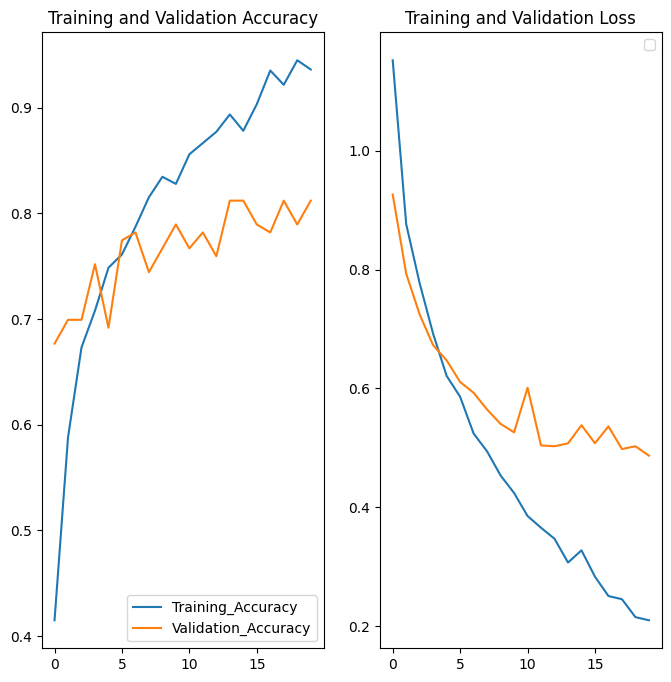

In [18]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training_Accuracy")
plt.plot(epochs_range, val_acc, label="Validation_Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss)
plt.plot(epochs_range, val_loss)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


